In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing and cleaning of data

In [61]:
actual_data=pd.read_csv('/content/data_week4.csv',encoding='latin1')

In [62]:
actual_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(541910, 8)

In [63]:
data = actual_data.sample(n=20000)

In [64]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
243150,558420,84050,PINK HEART SHAPE EGG FRYING PAN,3,29-06-2011 11:46,1.65,14577.0,United Kingdom
351648,567668,21775,DECORATIVE FLORE BATHROOM BOTTLE,1,21-09-2011 15:29,2.46,NaN,United Kingdom
25137,538354,20733,GOLD MINI TAPE MEASURE,20,10-12-2010 15:45,0.85,16873.0,United Kingdom
292197,562540,21500,PINK POLKADOT WRAP,25,05-08-2011 15:38,0.42,17400.0,United Kingdom
50926,540568,47566B,TEA TIME PARTY BUNTING,1,10-01-2011 11:22,4.65,15039.0,United Kingdom


In [65]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 243150 to 143387
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      20000 non-null  object 
 1   StockCode    20000 non-null  object 
 2   Description  19941 non-null  object 
 3   Quantity     20000 non-null  int64  
 4   InvoiceDate  20000 non-null  object 
 5   Price        20000 non-null  float64
 6   Customer ID  15033 non-null  float64
 7   Country      20000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.9+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,Price,Customer ID
count,20000.000000,20000.000000,15033.000000
mean,9.144600,4.334396,15263.012971
std,79.868427,42.290982,1708.230155
min,-9600.000000,0.000000,12347.000000
25%,1.000000,1.250000,13924.000000
50%,3.000000,2.080000,15105.000000
75%,10.000000,4.130000,16763.000000
max,3000.000000,4534.240000,18287.000000


In [66]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Invoice,0
StockCode,0
Description,59
Quantity,0
InvoiceDate,0
Price,0
Customer ID,4967
Country,0


In [67]:
data.dropna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
243150,558420,84050,PINK HEART SHAPE EGG FRYING PAN,3,29-06-2011 11:46,1.65,14577.0,United Kingdom
25137,538354,20733,GOLD MINI TAPE MEASURE,20,10-12-2010 15:45,0.85,16873.0,United Kingdom
292197,562540,21500,PINK POLKADOT WRAP,25,05-08-2011 15:38,0.42,17400.0,United Kingdom
50926,540568,47566B,TEA TIME PARTY BUNTING,1,10-01-2011 11:22,4.65,15039.0,United Kingdom
183299,552655,21242,RED RETROSPOT PLATE,1,10-05-2011 14:22,1.69,14587.0,United Kingdom
...,...,...,...,...,...,...,...,...
58738,541262,21714,CITRONELLA CANDLE GARDEN POT,2,16-01-2011 15:50,1.25,18069.0,United Kingdom
285747,561922,85014A,BLACK/BLUE POLKADOT UMBRELLA,2,01-08-2011 12:12,5.95,13167.0,United Kingdom
216098,555819,22678,FRENCH BLUE METAL DOOR SIGN 3,10,07-06-2011 12:00,1.25,15073.0,United Kingdom
101323,544912,21213,PACK OF 72 SKULL CAKE CASES,24,24-02-2011 15:12,0.55,18198.0,United Kingdom


invoice

In [68]:
data[pd.to_numeric(data['Invoice'], errors='coerce').isnull()]['Invoice']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice
391206,C570658
395107,C570996
55924,C541007
19436,C537860
479817,C577196
...,...
33862,C539302
227628,C556888
178797,C552237
481924,C577392


all entries which are not integers in invoice start with c which are cancelled orders

In [69]:
cancelled=data[data['Invoice'].str.startswith('C')]
cancelled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
391206,C570658,82616B,FRAPPUCINO SCARF KNITTING KIT,-9,11-10-2011 14:14,1.25,16120.0,United Kingdom
395107,C570996,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,-12,13-10-2011 12:02,0.85,14849.0,United Kingdom
55924,C541007,35004B,SET OF 3 BLACK FLYING DUCKS,-4,13-01-2011 10:47,4.65,13078.0,United Kingdom
19436,C537860,20897,VINTAGE NOTEBOOK PARIS DAYS,-6,08-12-2010 16:15,2.95,16252.0,United Kingdom
479817,C577196,23283,DOORMAT VINTAGE LEAF,-6,18-11-2011 11:45,8.25,16924.0,United Kingdom


In [70]:
data = data[~data['Invoice'].str.startswith('C')]
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
243150,558420,84050,PINK HEART SHAPE EGG FRYING PAN,3,29-06-2011 11:46,1.65,14577.0,United Kingdom
351648,567668,21775,DECORATIVE FLORE BATHROOM BOTTLE,1,21-09-2011 15:29,2.46,NaN,United Kingdom
25137,538354,20733,GOLD MINI TAPE MEASURE,20,10-12-2010 15:45,0.85,16873.0,United Kingdom
292197,562540,21500,PINK POLKADOT WRAP,25,05-08-2011 15:38,0.42,17400.0,United Kingdom
50926,540568,47566B,TEA TIME PARTY BUNTING,1,10-01-2011 11:22,4.65,15039.0,United Kingdom


stock code

In [71]:
data['StockCode'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['84050', '21775', '20733', ..., '37479B', '22167', '90177A'],
      dtype=object)

In [72]:
data['StockCode'].value_counts()

,count
StockCode,
85123A,87
22423,73
47566,71
85099B,71
21212,60
...,...
62043B,1
84926A,1
37468,1


In [73]:
other=data[~data['StockCode'].str.startswith(('1','2','3','4','5','6','7','8','9'))]
other.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
457658,575739,DOT,DOTCOM POSTAGE,1,11-11-2011 09:05,469.20,NaN,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,03-12-2010 11:13,254.43,NaN,United Kingdom
347757,567336,POST,POSTAGE,4,19-09-2011 14:56,18.00,12621.0,Germany
537462,581279,POST,POSTAGE,3,08-12-2011 11:35,18.00,12437.0,France
303497,563548,POST,POSTAGE,3,17-08-2011 12:30,18.00,12528.0,Germany


In [74]:
other.StockCode.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
StockCode,
POST,48
DOT,25
M,15
C2,3
DCGSSGIRL,1
DCGSSBOY,1


In [75]:
not_other=data[data['StockCode'].str.startswith(('1','2','3','4','5','6','7','8','9'))]
not_other.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
243150,558420,84050,PINK HEART SHAPE EGG FRYING PAN,3,29-06-2011 11:46,1.65,14577.0,United Kingdom
351648,567668,21775,DECORATIVE FLORE BATHROOM BOTTLE,1,21-09-2011 15:29,2.46,NaN,United Kingdom
25137,538354,20733,GOLD MINI TAPE MEASURE,20,10-12-2010 15:45,0.85,16873.0,United Kingdom
292197,562540,21500,PINK POLKADOT WRAP,25,05-08-2011 15:38,0.42,17400.0,United Kingdom
50926,540568,47566B,TEA TIME PARTY BUNTING,1,10-01-2011 11:22,4.65,15039.0,United Kingdom


In [76]:
not_other[not_other['StockCode'].apply(lambda x: len(x) != 5)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
50926,540568,47566B,TEA TIME PARTY BUNTING,1,10-01-2011 11:22,4.65,15039.0,United Kingdom
75238,542563,84509F,NaN,-1,28-01-2011 14:52,0.00,NaN,United Kingdom
123090,546891,85199S,SMALL HANGING IVORY/RED WOOD BIRD,5,17-03-2011 18:18,0.83,NaN,United Kingdom
350221,567618,47599A,PINK PARTY BAGS,6,21-09-2011 12:26,2.10,12721.0,France
39292,539631,84673B,BLUE FLY SWAT,1,20-12-2010 15:03,1.28,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
228147,556915,37479B,CUBIC MUG FLOCK BLUE ON BROWN,1,15-06-2011 13:35,0.39,15036.0,United Kingdom
540886,581492,90177A,CLASSIC DIAMANTE EARRINGS JET,1,09-12-2011 10:03,2.90,NaN,United Kingdom
285747,561922,85014A,BLACK/BLUE POLKADOT UMBRELLA,2,01-08-2011 12:12,5.95,13167.0,United Kingdom
280088,561371,85169A,IVORY LOVE BIRD CANDLE,2,26-07-2011 16:25,2.46,NaN,United Kingdom


invoice date

In [77]:
data=data[data['InvoiceDate']!='0']
data.InvoiceDate=pd.to_datetime(data.InvoiceDate,format='%d-%m-%Y %H:%M')
data.InvoiceDate.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceDate
243150,2011-06-29 11:46:00
351648,2011-09-21 15:29:00
25137,2010-12-10 15:45:00
292197,2011-08-05 15:38:00
50926,2011-01-10 11:22:00


In [78]:
data["Revenue"] = data.Quantity * data.Price

data["Year"] = data.InvoiceDate.dt.year
data["Quarter"] = data.InvoiceDate.dt.quarter
data["Month"] = data.InvoiceDate.dt.month
data["Week"] = data.InvoiceDate.dt.isocalendar().week
data["Weekday"] = data.InvoiceDate.dt.weekday
data["Day"] = data.InvoiceDate.dt.day
data["Dayofyear"] = data.InvoiceDate.dt.dayofyear
data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
243150,558420,84050,PINK HEART SHAPE EGG FRYING PAN,3,2011-06-29 11:46:00,1.65,14577.0,United Kingdom,4.95,2011,2,6,26,2,29,180,2011-06-29
351648,567668,21775,DECORATIVE FLORE BATHROOM BOTTLE,1,2011-09-21 15:29:00,2.46,NaN,United Kingdom,2.46,2011,3,9,38,2,21,264,2011-09-21
25137,538354,20733,GOLD MINI TAPE MEASURE,20,2010-12-10 15:45:00,0.85,16873.0,United Kingdom,17.00,2010,4,12,49,4,10,344,2010-12-10
292197,562540,21500,PINK POLKADOT WRAP,25,2011-08-05 15:38:00,0.42,17400.0,United Kingdom,10.50,2011,3,8,31,4,5,217,2011-08-05
50926,540568,47566B,TEA TIME PARTY BUNTING,1,2011-01-10 11:22:00,4.65,15039.0,United Kingdom,4.65,2011,1,1,2,0,10,10,2011-01-10


In [80]:
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day","StockCode"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
daily_data = pd.DataFrame(data.groupby(grouped_features).Quantity.sum(),columns=["Quantity"])
daily_data["Revenue"] = data.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head(5)

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,12,10.20
1,2010-12-01,2010,4,12,48,2,335,1,20727,2,8.42
2,2010-12-01,2010,4,12,48,2,335,1,20931,2,15.24
3,2010-12-01,2010,4,12,48,2,335,1,20972,12,15.00
4,2010-12-01,2010,4,12,48,2,335,1,20973,2,1.30


In [82]:
low_quantity = daily_data.Quantity.quantile(0.01)
high_quantity = daily_data.Quantity.quantile(0.99)
print((low_quantity, high_quantity))

low_revenue = daily_data.Revenue.quantile(0.01)
high_revenue = daily_data.Revenue.quantile(0.99)
print((low_revenue, high_revenue))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1.0, 100.0)
(0.42, 183.6)


In [83]:
daily_data = daily_data.loc[
    (daily_data.Quantity >= low_quantity) & (daily_data.Quantity <= high_quantity)]
daily_data = daily_data.loc[
    (daily_data.Revenue >= low_revenue) & (daily_data.Revenue <= high_revenue)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-84-25066f3cc1b7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daily_data.Quantity.values, kde=True, ax=ax[0], color="Orange", bins=30);
<ipython-input-84-25066f3cc1b7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(daily_data.Quantity.values), kde=True, ax=ax[1], colo

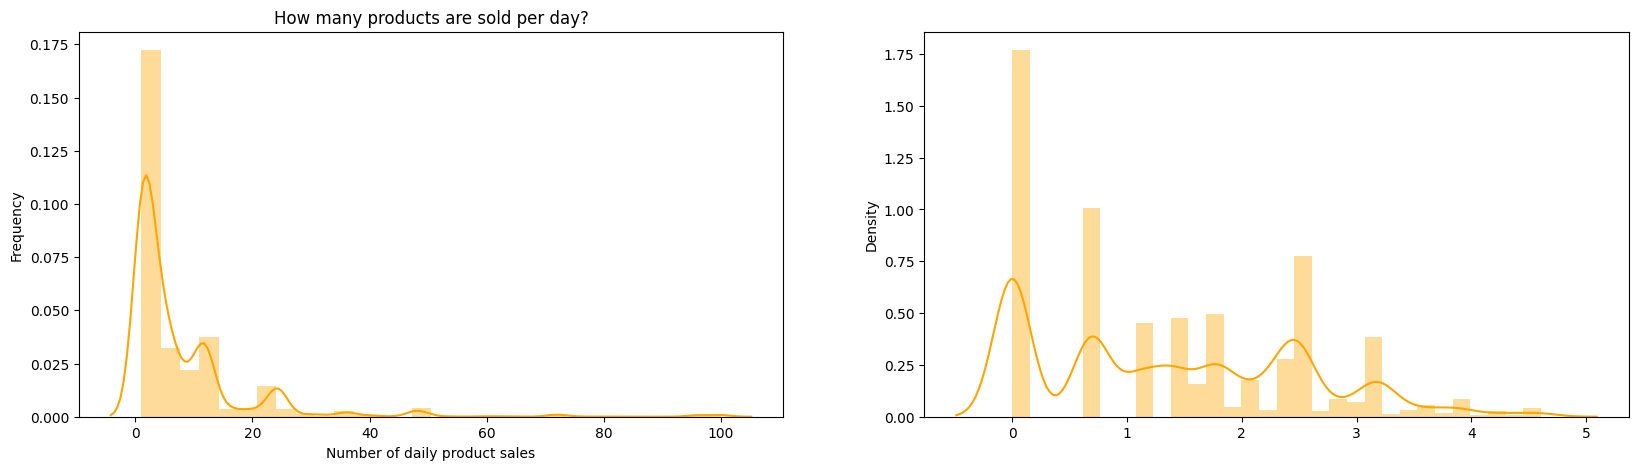

In [84]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(daily_data.Quantity.values, kde=True, ax=ax[0], color="Orange", bins=30);
sns.distplot(np.log(daily_data.Quantity.values), kde=True, ax=ax[1], color="Orange", bins=30);
ax[0].set_xlabel("Number of daily product sales");
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many products are sold per day?");

In [85]:
daily_data['PriceElasticity'] = (daily_data['Revenue'].pct_change() / daily_data['Quantity'].pct_change()).replace([np.inf, -np.inf], np.nan).fillna(0)
print(daily_data.head())


        Date  Year  Quarter  Month  Week  Weekday  Dayofyear  Day StockCode  \
0 2010-12-01  2010        4     12    48        2        335    1     10002   
1 2010-12-01  2010        4     12    48        2        335    1     20727   
2 2010-12-01  2010        4     12    48        2        335    1     20931   
3 2010-12-01  2010        4     12    48        2        335    1     20972   
4 2010-12-01  2010        4     12    48        2        335    1     20973   

   Quantity  Revenue  PriceElasticity  
0        12    10.20         0.000000  
1         2     8.42         0.209412  
2         2    15.24         0.000000  
3        12    15.00        -0.003150  
4         2     1.30         1.096000  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
daily_data['RollingAvgPrice'] = daily_data['Revenue'] / daily_data['Quantity']
daily_data['RollingAvgPrice'] = daily_data['RollingAvgPrice'].rolling(window=7).mean()
daily_data['CumulativePrice'] = daily_data['Revenue'].cumsum()
print(daily_data.head(10))


        Date  Year  Quarter  Month  Week  Weekday  Dayofyear  Day StockCode  \
0 2010-12-01  2010        4     12    48        2        335    1     10002   
1 2010-12-01  2010        4     12    48        2        335    1     20727   
2 2010-12-01  2010        4     12    48        2        335    1     20931   
3 2010-12-01  2010        4     12    48        2        335    1     20972   
4 2010-12-01  2010        4     12    48        2        335    1     20973   
5 2010-12-01  2010        4     12    48        2        335    1     20981   
6 2010-12-01  2010        4     12    48        2        335    1     21034   
7 2010-12-01  2010        4     12    48        2        335    1     21041   
8 2010-12-01  2010        4     12    48        2        335    1     21107   
9 2010-12-01  2010        4     12    48        2        335    1     21122   

   Quantity  Revenue  PriceElasticity  RollingAvgPrice  CumulativePrice  
0        12    10.20         0.000000              NaN  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
daily_data['LaggedRevenue_day'] = daily_data['Revenue'].shift(1).fillna(0)
daily_data['LaggedRevenue_week'] = daily_data['Revenue'].shift(7).fillna(0)
daily_data['LaggedRevenue_month'] = daily_data['Revenue'].shift(30).fillna(0)
print(daily_data.head(10))


        Date  Year  Quarter  Month  Week  Weekday  Dayofyear  Day StockCode  \
0 2010-12-01  2010        4     12    48        2        335    1     10002   
1 2010-12-01  2010        4     12    48        2        335    1     20727   
2 2010-12-01  2010        4     12    48        2        335    1     20931   
3 2010-12-01  2010        4     12    48        2        335    1     20972   
4 2010-12-01  2010        4     12    48        2        335    1     20973   
5 2010-12-01  2010        4     12    48        2        335    1     20981   
6 2010-12-01  2010        4     12    48        2        335    1     21034   
7 2010-12-01  2010        4     12    48        2        335    1     21041   
8 2010-12-01  2010        4     12    48        2        335    1     21107   
9 2010-12-01  2010        4     12    48        2        335    1     21122   

   Quantity  Revenue  PriceElasticity  RollingAvgPrice  CumulativePrice  \
0        12    10.20         0.000000              NaN 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


now we will check if data is seasonal or not

In [88]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
from sklearn.model_selection import train_test_split
X = daily_data.drop('Revenue', axis=1)
y = daily_data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
result = adfuller(daily_data['Revenue'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(f'n_lags: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ADF Statistic: -26.251408
p-value: 0.000000
n_lags: 0.0
Critical Values:
	1%: -3.4307040606842527
	5%: -2.8616964816657173
	10%: -2.566853291038761


since p valve is 0 therefore data is stationary and hence it doesnot require any differencing therefore d=0

In [91]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


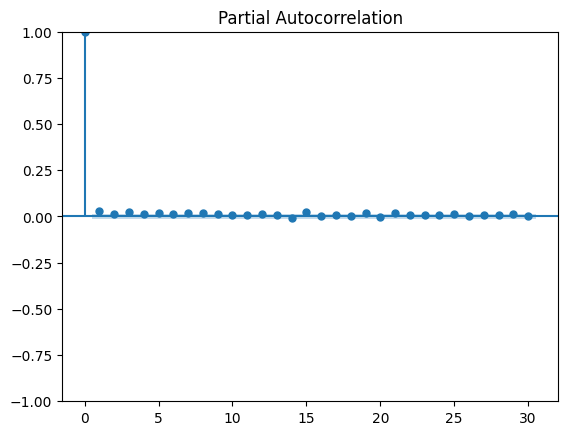

In [92]:
plot_pacf(daily_data['Revenue'], lags=30)
plt.show()


p=1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


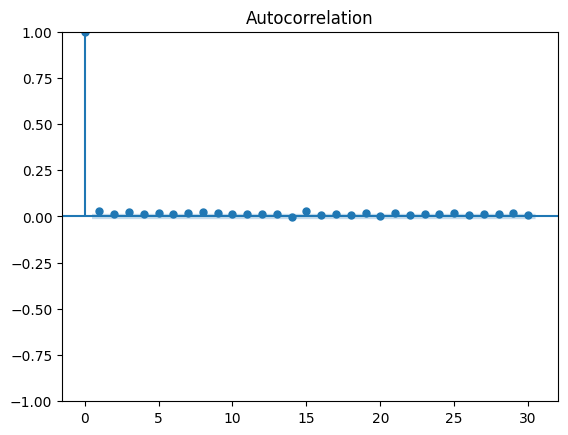

In [93]:
plot_acf(daily_data['Revenue'], lags=30);


acf plot shows that graph shuts down at q=1 so we will take value of q for moving averages as 1

In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [95]:
arima_model = ARIMA(y_train, order=(1, 0, 1))
arima_model_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [96]:
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                14794
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -65636.078
Date:                Sat, 10 Aug 2024   AIC                         131280.157
Time:                        11:30:37   BIC                         131310.564
Sample:                             0   HQIC                        131290.252
                              - 14794                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1395      0.302     50.091      0.000      14.547      15.732
ar.L1         -0.3967      0.728     -0.545      0.586      -1.823       1.029
ma.L1          0.4060      0.725      0.560      0.5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


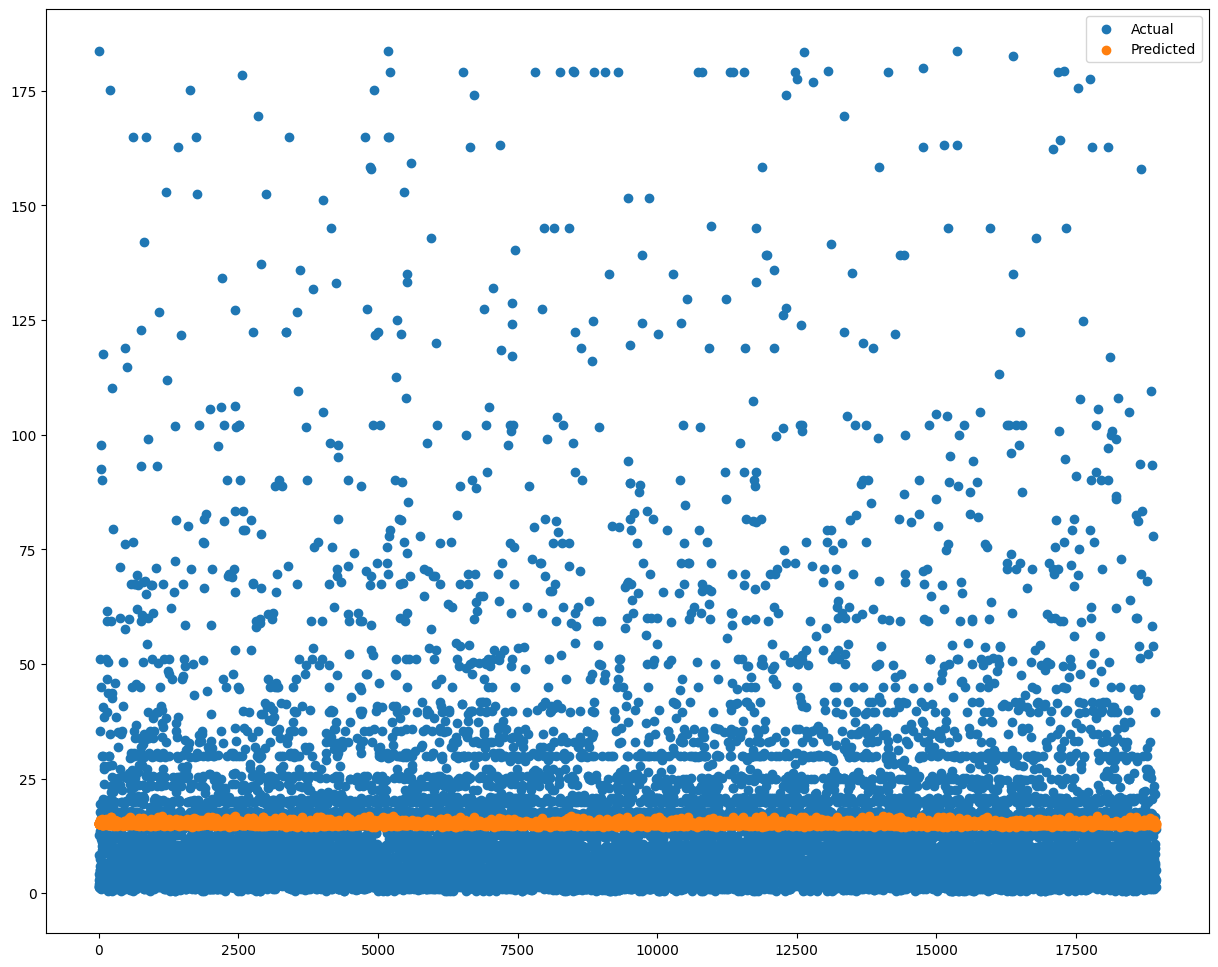

In [97]:
predictions = arima_model_fit.predict()
plt.figure(figsize=(15, 12))
plt.scatter(y_train.index,y_train, label='Actual')
plt.scatter(predictions.index,predictions, label='Predicted')
plt.legend()
plt.show()

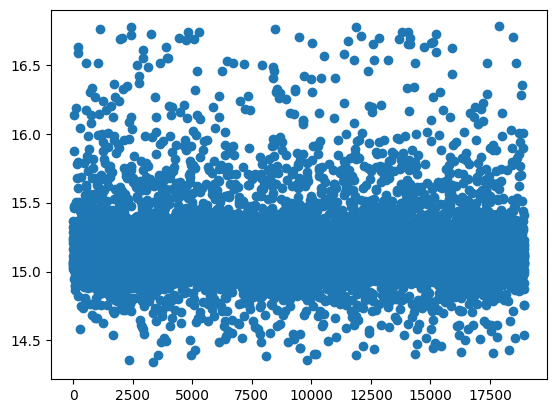

In [98]:
plt.scatter(predictions.index,predictions, label='Predicted')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE on Test Set: 20.78149102788592


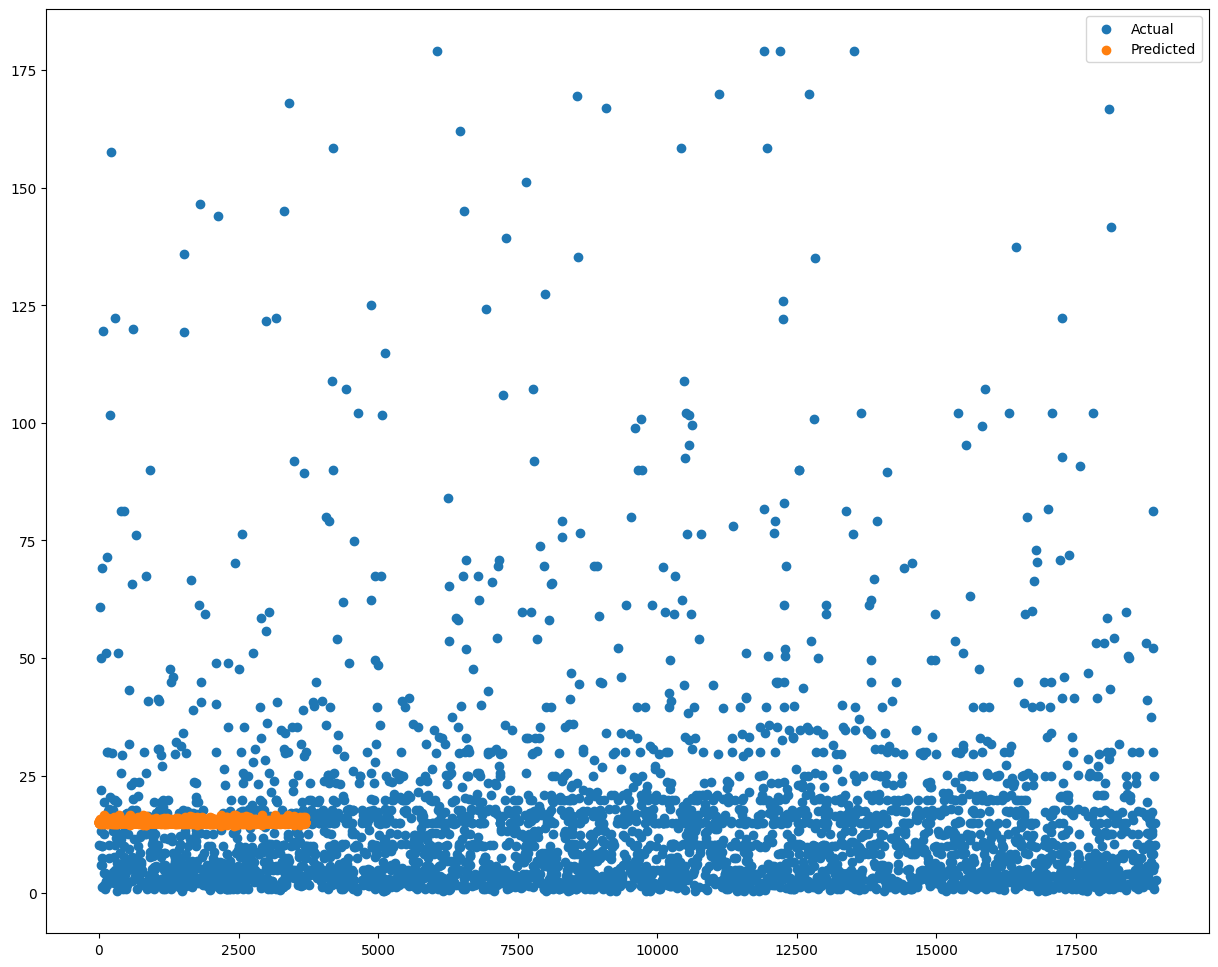

In [99]:
import matplotlib.pyplot as plt
import numpy as np
# Predict on the test set
y_test = y_test.sort_index()

# Predict on the test set, ensuring start is before end
start_index = y_test.index[0]
end_index = y_test.index[-1]

if start_index > end_index:
    raise ValueError("Start index must be before end index.")

test_predictions = arima_model_fit.predict(start=start_index, end=end_index)[:len(y_test)]

# Evaluate the model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'RMSE on Test Set: {rmse}')

# Visualize the predictions against actual values
plt.figure(figsize=(15, 12))
plt.scatter(y_test.index, y_test, label='Actual')
plt.scatter(test_predictions.index, test_predictions, label='Predicted')
plt.legend()
plt.show()


In [100]:
from prophet import Prophet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
daily_data.columns

Index(['Date', 'Year', 'Quarter', 'Month', 'Week', 'Weekday', 'Dayofyear',
       'Day', 'StockCode', 'Quantity', 'Revenue', 'PriceElasticity',
       'RollingAvgPrice', 'CumulativePrice', 'LaggedRevenue_day',
       'LaggedRevenue_week', 'LaggedRevenue_month'],
      dtype='object')

In [102]:
data_2=data[['Date','Revenue']]

In [103]:
data_2 = data_2.rename(columns={'Date': 'ds', 'Revenue': 'y'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
model = Prophet()
model.fit(data_2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbh9ibeqf/2_iakg2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbh9ibeqf/d5n0gidt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28890', 'data', 'file=/tmp/tmpbh9ibeqf/2_iakg2w.json', 'init=/tmp/tmpbh9ibeqf/d5n0gidt.json', 'output', 'file=/tmp/tmpbh9ibeqf/prophet_modelk2v1zb0g/prophet_model-20240810113040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:30:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:30:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [105]:
future = model.make_future_dataframe(periods=90)
future.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ds
390,2012-03-04
391,2012-03-05
392,2012-03-06
393,2012-03-07
394,2012-03-08


In [106]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ds,yhat,yhat_lower,yhat_upper
390,2012-03-04,6.037720,-76.209469,93.632422
391,2012-03-05,13.207216,-63.009020,93.508720
392,2012-03-06,13.836958,-70.398427,95.867316
393,2012-03-07,11.394004,-68.990271,92.917590
394,2012-03-08,12.363865,-61.868210,89.338737


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  

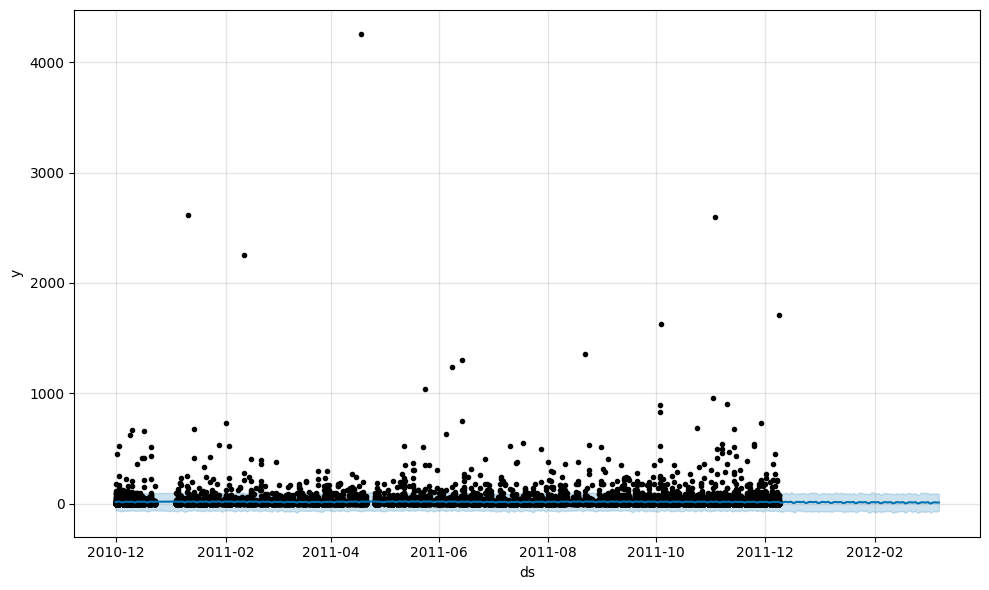

In [107]:
fig1 = model.plot(forecast)


In [108]:
daily_data.columns

Index(['Date', 'Year', 'Quarter', 'Month', 'Week', 'Weekday', 'Dayofyear',
       'Day', 'StockCode', 'Quantity', 'Revenue', 'PriceElasticity',
       'RollingAvgPrice', 'CumulativePrice', 'LaggedRevenue_day',
       'LaggedRevenue_week', 'LaggedRevenue_month'],
      dtype='object')

In [109]:
X=daily_data[[ 'Year', 'Quarter', 'Month', 'Week', 'Weekday', 'Dayofyear','Day']]
y=daily_data['Revenue']

In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18493 entries, 0 to 18929
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       18493 non-null  int32 
 1   Quarter    18493 non-null  int32 
 2   Month      18493 non-null  int32 
 3   Week       18493 non-null  UInt32
 4   Weekday    18493 non-null  int32 
 5   Dayofyear  18493 non-null  int32 
 6   Day        18493 non-null  int32 
dtypes: UInt32(1), int32(6)
memory usage: 668.2 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


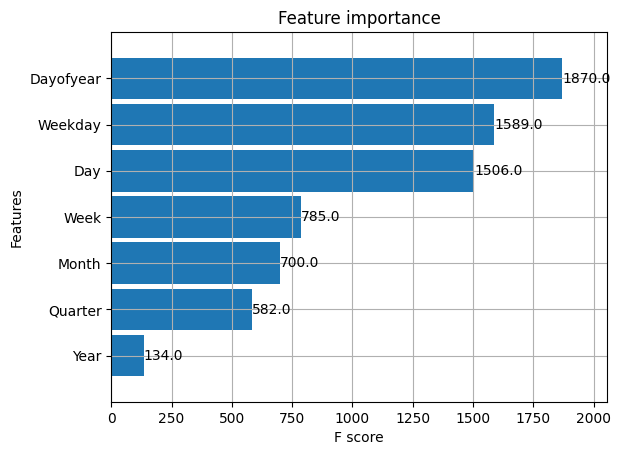

In [113]:
_ = plot_importance(reg, height=0.9)

In [114]:
pred = reg.predict(X_test)

print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))

430.1132277104963
11.947771463659718


In [115]:
pred = pd.Series(pred, index=y_test.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
y_test

,Revenue
14261,1.69
15312,11.70
5095,14.85
6194,31.80
9517,4.65
...,...
3328,3.75
627,23.60
10041,0.83
12824,13.90


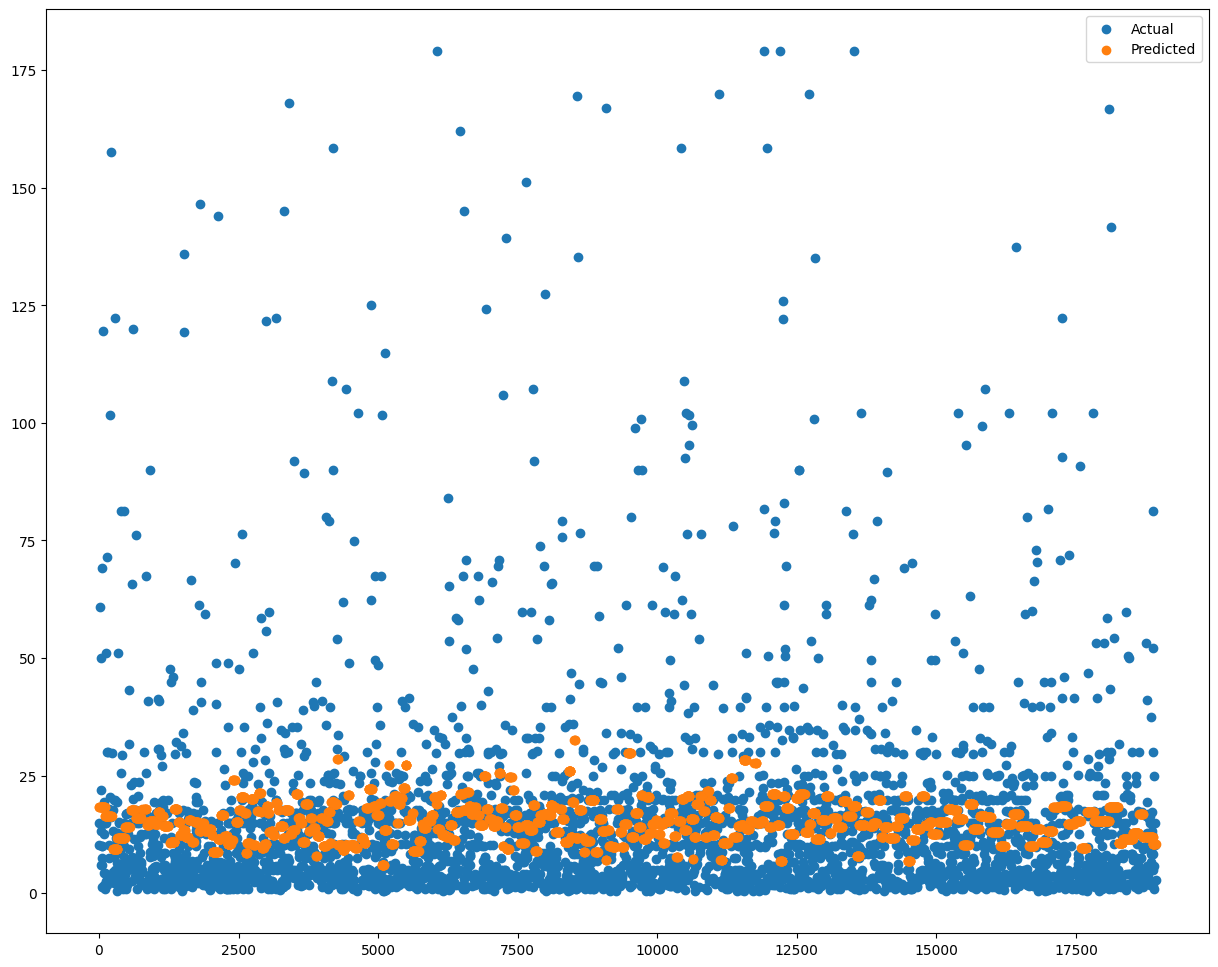

In [117]:
plt.figure(figsize=(15, 12))
plt.scatter(y_test.index,y_test, label='Actual')
plt.scatter(pred.index,pred, label='Predicted')
plt.legend()
plt.show()

In [118]:

import gym
from gym import spaces
import numpy as np

class DynamicPricingEnv(gym.Env):
  def __init__(self, demand_curve, initial_price, cost, max_price, min_price):
    super(DynamicPricingEnv, self).__init__()

    self.demand_curve = demand_curve
    self.initial_price = initial_price
    self.current_price = initial_price
    self.cost = cost
    self.max_price = max_price
    self.min_price = min_price

    # Define action and observation spaces
    self.action_space = spaces.Discrete(3)  # 0: decrease price, 1: keep price, 2: increase price
    self.observation_space = spaces.Box(low=min_price, high=max_price, shape=(1,), dtype=np.float32)

  def step(self, action):
    if action == 0:
      self.current_price = max(self.current_price - 1, self.min_price)  # Decrease price
    elif action == 2:
      self.current_price = min(self.current_price + 1, self.max_price)  # Increase price

    # Calculate demand based on demand curve and current price
    demand = self.demand_curve(self.current_price)

    # Calculate reward (profit)
    revenue = self.current_price * demand
    profit = revenue - (self.cost * demand)
    reward = profit

    # Check if episode is done (e.g., reached a time limit)
    done = False  # Replace with your own termination condition

    # Provide observation (current price)
    observation = np.array([self.current_price], dtype=np.float32)

    return observation, reward, done, {}

  def reset(self):
    self.current_price = self.initial_price
    observation = np.array([self.current_price], dtype=np.float32)
    return observation

# Example demand curve (you can customize this)
def demand_curve(price):
  return 100 - price  # Simple linear demand curve

# Initialize environment
env = DynamicPricingEnv(demand_curve=demand_curve, initial_price=50, cost=20, max_price=100, min_price=10)

# Example interaction with the environment
observation = env.reset()
for _ in range(10):
  action = env.action_space.sample()  # Random action
  observation, reward, done, _ = env.step(action)
  print(f"Price: {observation[0]}, Reward: {reward}")


Price: 49.0, Reward: 1479
Price: 49.0, Reward: 1479
Price: 48.0, Reward: 1456
Price: 49.0, Reward: 1479
Price: 49.0, Reward: 1479
Price: 50.0, Reward: 1500
Price: 50.0, Reward: 1500
Price: 50.0, Reward: 1500
Price: 50.0, Reward: 1500
Price: 49.0, Reward: 1479
